In [1]:
#Module 4 submission by Gaurav Kataria
#Problem Statement 4.1
#To do - 
# 1. Import csv file containinng Bollinger columns
# 2. Create a new column Call with values 'Buy', 'Hold Buy', Hold Short' and 'Short'
# 3. Train a classification model and check the accuracy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ray=pd.read_csv(r'C:\Users\gaura\Desktop\_\smallcap\Small_Cap\RAYMOND.csv')

In [4]:
ray

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,464539,3.739298e+08,9381,22009,4.74


In [5]:
ray['14 Day MA']=ray['Close Price'].rolling(window=14).mean()
ray['30 Day STD']=ray['Close Price'].rolling(window=20).std()
ray['Upper Band']=ray['14 Day MA'] + (ray['30 Day STD'] * 2)
ray['Lower Band']=ray['14 Day MA'] - (ray['30 Day STD'] * 2)
ray = ray.dropna()
ray['Mid Band']=(ray['Upper Band']+ray['Lower Band'])/2
ray

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,RAYMOND,EQ,09-Jun-2017,733.50,734.50,736.45,725.55,729.00,732.10,729.90,194159,1.417171e+08,5991,49516,25.50,708.378571,33.653951,775.686473,641.070670,708.378571
20,RAYMOND,EQ,12-Jun-2017,732.10,731.55,741.55,713.05,719.75,717.70,726.26,298904,2.170829e+08,10033,52812,17.67,709.675000,31.482160,772.639320,646.710680,709.675000
21,RAYMOND,EQ,13-Jun-2017,717.70,723.00,747.50,718.60,731.40,730.85,735.79,966568,7.111887e+08,25790,114480,11.84,714.575000,27.645755,769.866510,659.283490,714.575000
22,RAYMOND,EQ,14-Jun-2017,730.85,713.55,730.05,703.80,727.00,721.60,713.36,853674,6.089792e+08,19312,95684,11.21,717.667857,22.803477,763.274810,672.060904,717.667857
23,RAYMOND,EQ,15-Jun-2017,721.60,723.00,738.75,720.00,731.60,729.90,730.65,410749,3.001149e+08,11669,58513,14.25,718.292857,21.790120,761.873097,674.712618,718.292857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78,773.471429,20.707387,814.886202,732.056655,773.471429
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52,775.110714,21.086463,817.283640,732.937789,775.110714
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15,775.725000,21.008485,817.741969,733.708031,775.725000
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,464539,3.739298e+08,9381,22009,4.74,776.385714,21.412932,819.211578,733.559850,776.385714


In [6]:
def call(ray):
    if ray['Close Price'] < ray['Lower Band']:
        return "Buy"
    if ray['Close Price'] > ray['Lower Band'] and ray['Close Price'] < ray['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if ray['Close Price'] > ray['Mid Band'] and ray['Close Price'] < ray['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if ray['Close Price'] > ray['Upper Band']:
        return "Short"
ray=ray.assign(Call = ray.apply(call, axis=1))

In [7]:
ray

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,RAYMOND,EQ,09-Jun-2017,733.50,734.50,736.45,725.55,729.00,732.10,729.90,...,1.417171e+08,5991,49516,25.50,708.378571,33.653951,775.686473,641.070670,708.378571,Hold Short/ Liquidate Buy
20,RAYMOND,EQ,12-Jun-2017,732.10,731.55,741.55,713.05,719.75,717.70,726.26,...,2.170829e+08,10033,52812,17.67,709.675000,31.482160,772.639320,646.710680,709.675000,Hold Short/ Liquidate Buy
21,RAYMOND,EQ,13-Jun-2017,717.70,723.00,747.50,718.60,731.40,730.85,735.79,...,7.111887e+08,25790,114480,11.84,714.575000,27.645755,769.866510,659.283490,714.575000,Hold Short/ Liquidate Buy
22,RAYMOND,EQ,14-Jun-2017,730.85,713.55,730.05,703.80,727.00,721.60,713.36,...,6.089792e+08,19312,95684,11.21,717.667857,22.803477,763.274810,672.060904,717.667857,Hold Short/ Liquidate Buy
23,RAYMOND,EQ,15-Jun-2017,721.60,723.00,738.75,720.00,731.60,729.90,730.65,...,3.001149e+08,11669,58513,14.25,718.292857,21.790120,761.873097,674.712618,718.292857,Hold Short/ Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,...,1.660574e+09,33444,321610,15.78,773.471429,20.707387,814.886202,732.056655,773.471429,Hold Short/ Liquidate Buy
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,...,7.510262e+08,19028,51327,5.52,775.110714,21.086463,817.283640,732.937789,775.110714,Hold Short/ Liquidate Buy
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,...,3.419611e+08,8608,34675,8.15,775.725000,21.008485,817.741969,733.708031,775.725000,Hold Short/ Liquidate Buy
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,...,3.739298e+08,9381,22009,4.74,776.385714,21.412932,819.211578,733.559850,776.385714,Hold Short/ Liquidate Buy


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_X = ray[['Upper Band','Lower Band','Mid Band','Close Price']]
transformed_label = le.fit_transform(ray[['Call']])
train_Y = transformed_label.reshape(-1,1)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9621

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_X,train_Y)
gnb.predict(train_X)
print("Naive Bayes")
round(gnb.score(train_X, train_Y), 4)

Naive Bayes


C:\Users\gaura\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5137

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)  

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forests


0.7916

In [12]:
from sklearn import svm  
SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4) 

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machines


C:\Users\gaura\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7705

In [13]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("MLPNN")
round(NN.score(train_X, train_Y), 4)  

MLPNN


C:\Users\gaura\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.48

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',p=1)
knn.fit(train_X, train_Y)
knn.predict(train_X)
print("KNN")
round(knn.score(train_X, train_Y), 4)

KNN


C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [15]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_X,train_Y)
sgd.predict(train_X)
print("SGD")
round(sgd.score(train_X, train_Y),4)

SGD


C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8568

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
dt.predict(train_X)
print("DT")
round(dt.score(train_X, train_Y),4)

DT


1.0

In [17]:
#Problem Statement 4.2
#To do - 
# 1. Import any CSV file 
# 2. Create 4 new columns
# 3. Create a new column Action
# 4. Construct a classification model
# 5. Check the accuracy of the model and also plot the net cumulative returns in percentage

In [18]:
bajajelec=pd.read_csv(r'C:\Users\gaura\Desktop\_\smallcap\Small_Cap\BAJAJELEC.csv')
bajajelec 

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJAJELEC,EQ,15-May-2017,350.75,351.20,352.30,339.10,342.00,341.15,344.83,150265,51815366.05,2733,91705,61.03
1,BAJAJELEC,EQ,16-May-2017,341.15,342.90,350.50,341.65,346.60,347.00,346.14,118849,41138046.60,2671,53340,44.88
2,BAJAJELEC,EQ,17-May-2017,347.00,347.10,352.00,345.85,349.50,349.85,349.90,108592,37996454.75,2259,46366,42.70
3,BAJAJELEC,EQ,18-May-2017,349.85,346.95,346.95,331.50,336.00,334.10,339.31,158652,53831647.20,3454,91087,57.41
4,BAJAJELEC,EQ,19-May-2017,334.10,339.05,344.00,332.00,335.50,336.20,338.64,129244,43767310.50,3097,47468,36.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,68237,38066482.60,5173,21908,32.11
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,160037,87171061.90,11144,39062,24.41
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,81531,43278252.70,3990,32290,39.60
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,177917,94880470.80,7768,31813,17.88


In [19]:
bajajelec ['%chg op_cl'] = ((bajajelec ['Close Price'] - bajajelec ['Open Price'])/(bajajelec ['Close Price']))*100
bajajelec ['%chg lw_hg'] = ((bajajelec ['Close Price'] - bajajelec  ['High Price'])/(bajajelec ['Low Price']))*100
bajajelec ['%chg 5dymean'] = bajajelec ['Close Price'].pct_change().dropna().rolling(5).mean()
bajajelec ['%chg 5dystd'] = bajajelec ['Close Price'].pct_change().dropna().rolling(5).std()
bajajelec  = bajajelec .dropna()
bajajelec 

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,BAJAJELEC,EQ,22-May-2017,336.20,338.00,339.95,297.40,313.20,313.25,315.99,436640,1.379733e+08,9573,128883,29.52,-7.901038,-8.977808,-0.016327,0.037930
6,BAJAJELEC,EQ,23-May-2017,313.25,314.00,318.50,299.30,316.50,315.55,309.44,174457,5.398398e+07,4615,59422,34.06,0.491206,-0.985633,-0.018288,0.035969
7,BAJAJELEC,EQ,24-May-2017,315.55,316.00,344.00,316.00,330.00,327.95,333.41,713070,2.377411e+08,11873,139627,19.58,3.643848,-5.079114,-0.012072,0.043576
8,BAJAJELEC,EQ,25-May-2017,327.95,329.95,348.50,327.05,347.00,346.20,343.29,527663,1.811429e+08,9390,169067,32.04,4.693819,-0.703256,0.008062,0.047616
9,BAJAJELEC,EQ,26-May-2017,346.20,342.20,361.40,340.00,361.40,359.45,354.09,498356,1.764621e+08,13974,249504,50.07,4.798998,-0.573529,0.014459,0.049432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,68237,3.806648e+07,5173,21908,32.11,-0.582698,-1.313287,-0.004425,0.006207
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,160037,8.717106e+07,11144,39062,24.41,-4.967724,-5.009434,-0.013324,0.016600
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,81531,4.327825e+07,3990,32290,39.60,0.159819,-0.675547,-0.012076,0.017037
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,177917,9.488047e+07,7768,31813,17.88,2.384914,-0.786043,-0.006550,0.021521


In [20]:
arr = []
val = []
for value in bajajelec ['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
bajajelec ['Action'] = pd.DataFrame(val)
bajajelec  = bajajelec .dropna()
bajajelec 

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,BAJAJELEC,EQ,22-May-2017,336.20,338.00,339.95,297.40,313.2,313.25,315.99,436640,1.379733e+08,9573,128883,29.52,-7.901038,-8.977808,-0.016327,0.037930,-1.0
6,BAJAJELEC,EQ,23-May-2017,313.25,314.00,318.50,299.30,316.5,315.55,309.44,174457,5.398398e+07,4615,59422,34.06,0.491206,-0.985633,-0.018288,0.035969,-1.0
7,BAJAJELEC,EQ,24-May-2017,315.55,316.00,344.00,316.00,330.0,327.95,333.41,713070,2.377411e+08,11873,139627,19.58,3.643848,-5.079114,-0.012072,0.043576,-1.0
8,BAJAJELEC,EQ,25-May-2017,327.95,329.95,348.50,327.05,347.0,346.20,343.29,527663,1.811429e+08,9390,169067,32.04,4.693819,-0.703256,0.008062,0.047616,1.0
9,BAJAJELEC,EQ,26-May-2017,346.20,342.20,361.40,340.00,361.4,359.45,354.09,498356,1.764621e+08,13974,249504,50.07,4.798998,-0.573529,0.014459,0.049432,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,BAJAJELEC,EQ,16-Apr-2019,571.70,575.00,587.70,572.00,581.0,578.35,581.31,378747,2.201697e+08,10799,119261,31.49,0.579234,-1.634615,0.013489,0.010969,1.0
479,BAJAJELEC,EQ,18-Apr-2019,578.35,580.00,580.05,563.20,565.0,566.85,570.64,160547,9.161472e+07,6591,33060,20.59,-2.319838,-2.343750,0.006167,0.018142,1.0
480,BAJAJELEC,EQ,22-Apr-2019,566.85,561.25,578.00,553.70,564.9,564.50,564.43,208147,1.174837e+08,8409,33665,16.17,0.575731,-2.438143,0.005883,0.018326,-1.0
481,BAJAJELEC,EQ,23-Apr-2019,564.50,569.00,569.95,556.70,560.7,560.70,560.81,428917,2.405416e+08,9238,292279,68.14,-1.480292,-1.661577,0.001729,0.018369,-1.0


In [21]:
train_X = bajajelec[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = bajajelec[['Action']]
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)  

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forests


0.6297

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


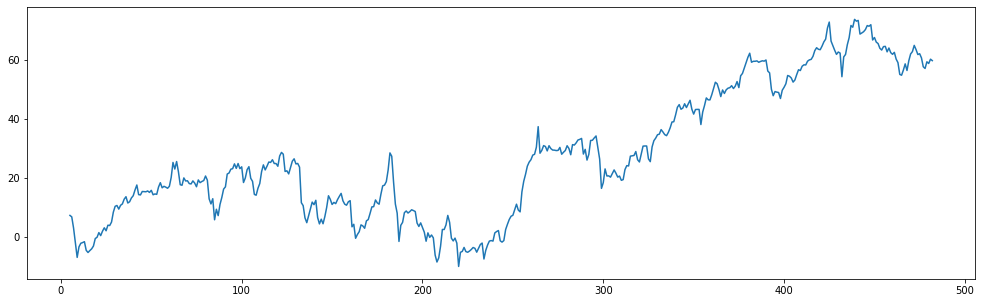

In [23]:
bajajelec ['Net Cummulative Returns'] = (((bajajelec ['Open Price'] - bajajelec ['Close Price'])/(bajajelec ['Open Price']))*100).cumsum()
plt.figure(figsize=(17,5))
plt.plot(bajajelec ['Net Cummulative Returns'])